# __BUDT704 - Project Update__

## __Credit Card Defaulter Prediction__

#### Group 18 (Runtime Terror): Dishant Vakte, Jeffi Edelbert, Rakshit Sinha, Yatin Koul, Zhanyi Zhu, Zheng Cen


---



## **Project Overview**

A major chunk of bank revenue is generated by credit cards. Customers who fail to pay their credit card dues on time could potentially cost banks a lot of revenue. The clients whose default value is Yes, means that they do not pay their credit card before the due time. While the clients whose default value is No, means that they successfully pay their credit card before the due time.


Issuing credit cards to customers who have a higher likelihood of not paying their dues on time involves higher risk for the bank. Issuing these customers cards with a higher interest rate would work in favor of the bank. 
Prediction can be done based on factors like job, education, balance, loans and house ownership. 


Finding out which are the most common factors that defaulters have will also help the bank to be cautious before issuing a credit card to customers who falls into one those categories.


## **Milestones and Progress**
### **Data Importing and set up:**
Before analyzing the independent variables which may become the potential risks for default, the first step should be knowing the basic structure (shape) of data set. With a general understanding of our data, we can make wiser strategies for following data process and analysis steps. We have met this milestone by finding the row and column numbers, the categorical values of some columns, the statistic description of numerical values of some columns etc.   

### **Data Cleaning:**
Data cleaning and processing is important for further analysis about how other factors can affect the default rate because the uniform format, readable columns and reasonable imputing values for missing data can make following data analysis and machine learning steps easier. We have met this milestone by assigning readable column names, classifying unknown data, creating new dummy values for future correlation tests, outlier detection and ML implementations.

### **Data analysis:**
We first conduct the correlation analysis, in which we test factors like age, job, education, balance, loans and house ownership etc. Although the basic results reveal that each of these single variables is not very correlated with default, which is the target variable, it gives us the opportunity to combine these variables together to show their correlations with default. Besides, we also look deep into our data to better understanding data. For example, we found that the age range of the majority is from 20-65. We also made several plots to visualize the relationships between either single or combined independent variables with the default variable. Furthermore, we even visualize the relationship among independent variables (like age and job) to get better understanding of potential interactions among independent variables. However, we do not find some obvious correlations between independent variables and the default variable.
Therefore, to improve the correlations and also make these data more suitable for performing statistical inferences and ML implementations, we created a new column for each categorical value in some columns like job, education etc. With this method, we can better understand the correlation between a certain subgroup of a variable without target variable. We indeed found higher correlation between some of the new transformed variables such as job_entrepreuner and loan_yes with default. 

### **Machine learning:**
We planned to apply various machine learning algorithms to get the best model. 
However, based on our previous jobs on understanding the structure of the data, we found a huge imbalance of data in default (around 96% samples have the default value as No and only around 4% samples have the default value as Yes). Therefore, we came up with some solutions on this problem like undersampling (randomly selecting data which have the default value as No to reach a similar size of total sample number of default==’Yes’), oversampling (duplicating data which have the default value as Yes to reach a similar size of total sample number of default==’No’) and SMOTE (Synthetic Minority Oversampling Technique). With all these different models, we can choose the best model based on the best F-1 score (as the dataset is highly imbalanced) on the original dataset, which can help us better predict whether a customer may have a high risk of default or not.


## **Data Pre-processing and Exploratory Data Analysis** 

Data for analysis is available from Bank Marketing Data Set for a Portugese Bank in http://archive.ics.uci.edu/ml/datasets/Bank+Marketing.

The dataset has 41188 rows and 21 columns. 
The variables are divided into 3 categories. The dataset has varibales for bank client data, data related with last contact to customer of the current campaign and social and economic context attributes. 

The categories of variables important to our analysis of loan defaulters are bank client data and economic context attributes. This will allow us to study the customer demgraphics and the socio-economic factors which contribute towards defaulting.  

In [ ]:
#importing libraries: numpy for 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#importing dataset
df = pd.read_csv('bank-full.csv', sep=';') 

In [ ]:
#checking the head
df.head() 

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


Exploring the shape of the data to determine the number of rows and columns. 

In [ ]:
df.shape  # checking the shape

(45211, 17)

Exploring information regarding some columns:

The 'default' variable describes if a customer has defaulted on the payment or not. This data is important for the prediction model. Therefore, we are interested in knowing the unique values associated with this variable. We also view unique values in poutcome.

In [ ]:
df['default'].unique() # checking the catgeories of the columns

array(['no', 'yes'], dtype=object)

In [ ]:
df['poutcome'].unique()  # checking the catgeories of the columns Term Deposit

array(['unknown', 'failure', 'other', 'success'], dtype=object)

We observe that not all columns have the right column names. Renaming column names to more appropriate names depending on the data it contains. Renaming 'y' to 'Term Deposit'

In [ ]:
df.columns 

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [ ]:
df.columns = ['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'Term Deposit']

In [ ]:
df.head() # checking the head

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Term Deposit
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


### __Data Pre-processing__
Data Pre-processing consists of variety of steps such as data cleaning, data manipulation, etc. The purpose is to get the actual picture of the data and making it 'Analysis ready'.<br>
Also determining which varibales we would focus our analysis on. 

Performing descriptive statistics on the data to understand the data further. This would give some insight into the distribution of the numerical data in the dataset.

In [ ]:
df.describe() # checking descriptive statistics for the numerical columns

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


From the above analysis, there is a clear indication of outliers in the dataset. 

The 25th, 50th and 75th percentile values for pday and previous are the same, whereas the max value is quite large. This is an indication of outliers. 

We will clean up these outliers later on in the data cleaning process. 

In [ ]:
df['poutcome'].unique() # checking the various catgeories in poutcome

array(['unknown', 'failure', 'other', 'success'], dtype=object)

__Custom function - poutcome_imputer()__ 

Column poutcome has values 'unknown' and 'other' values. These are null values and need to be transformed into a single unknown value. 
Using custom function poutcome_imputer, changing values 'unknown' to 'other' 

In [ ]:
def poutcome_imputer(x):
    '''
    This function converts all the 'unknown' marked values to 'other'. This custome function is designed specifically for poutcome column.
    '''
    if x == 'unknown': # checking if a value in 'unknown' or not
        return 'other' # if yes, change it to 'other'
    else: 
        return x # else return original value

In [ ]:
df['poutcome'] = df['poutcome'].apply(lambda x: poutcome_imputer(x)) # implementing the custome function on the poutcome column

In [ ]:
df['poutcome'].unique() # checking the various catgeories in poutcome

array(['other', 'failure', 'success'], dtype=object)

__Custom Function - target_converter()__

'default' is the target variable and it is important to be able to perform statistical analysis on this variable. Currently, the values in this variable are categorical. Converting the categorical variable to dummy values of 1 for yes and 0 for no using custom function target_converter(). This is being done so that we can calculate the correlation of our target variable with other columns.

There are two ways to do this. 
First, create a custom function and implement it on the column (less memory consumption).
Second, use the labelEncoding function from sklearn.preprocessing (more memeory consumption as we are calling in a package)
We will go with the first method as it is more computationally efficient.

In [ ]:
def target_converter(x):
    """
    This function will convert values 'yes' to 1 and 'no' to 0 for the input parameter/column
    """
    if x =='yes': # checking the condition, if value is 'yes'
        return 1 # change it to 1
    elif x =='no': # else
        return 0 # change it to 0

In [ ]:
# using lambda function for conversion and storing the new dummy values in a new variable 'default_num' 
df['default2'] = df['default'].apply(lambda x: target_converter(x))

Correlation between different variables and the target variable

Exploring the correlation between different variables and the target variable 'default'  to understand which variables we need to further explore in our analysis

In [ ]:
100 * df.corr()['default2'].sort_values()[:-1]
# we are multilying the correlation of each numerical column with default2. 100 is being multiplied so that we can quantify the information as 'percentage'.

balance    -6.674506
pdays      -2.997936
previous   -1.832940
age        -1.787930
duration   -1.002146
day         0.942390
campaign    1.682153
Name: default2, dtype: float64

Through the above correlation data, we can see that the variables are highly uncorrelated with the target variable. This opens up scope for feature engineering for future analysis. Different columns would be clubbed/dummied out to make them more correlated with the target variable. The data has a lot of categorical values, once we convert those to dummy numerical values we may see a change in the correlation.

The above observation also shows that, since the columns are mostly uncorrelated, then it could be a case of 'Non-Linear Distribution of Data'. That is, the data is distributed quite sparsely and we can expect high skewness in various columns

In [ ]:
df.describe() # checking descriptive stats

,age,balance,day,duration,campaign,pdays,previous,default2
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323,0.018027
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441,0.133049
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000,1.000000


### __Outlier Detection__
We can notice a few outliers in the 'previous', 'pdays', 'campaign' and 'duration'. Let's explore them a bit by plotting histograms of the mentioned columns to see their exact distribution.

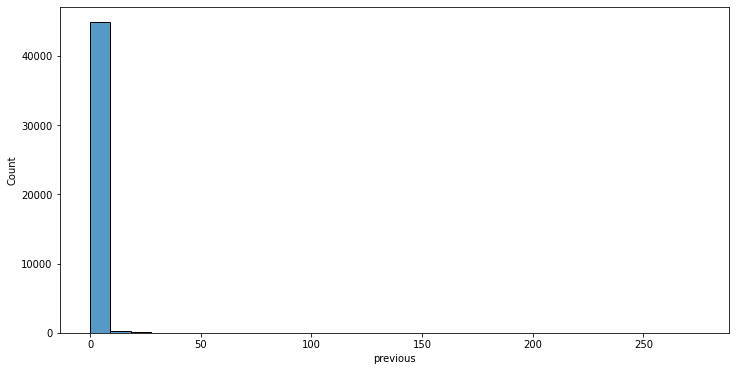

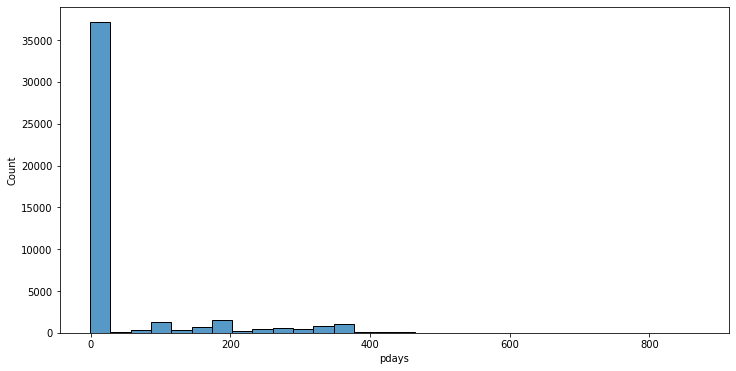

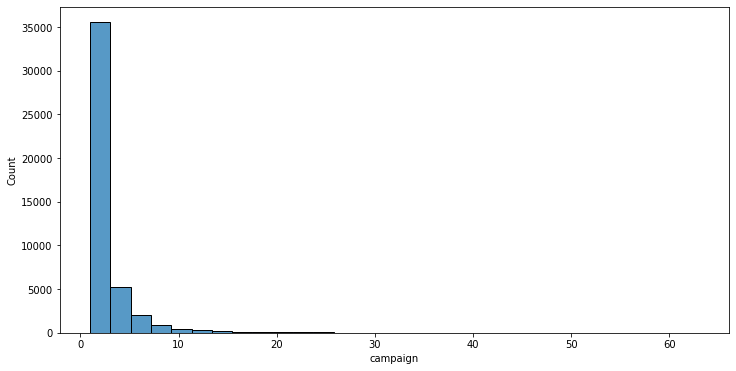

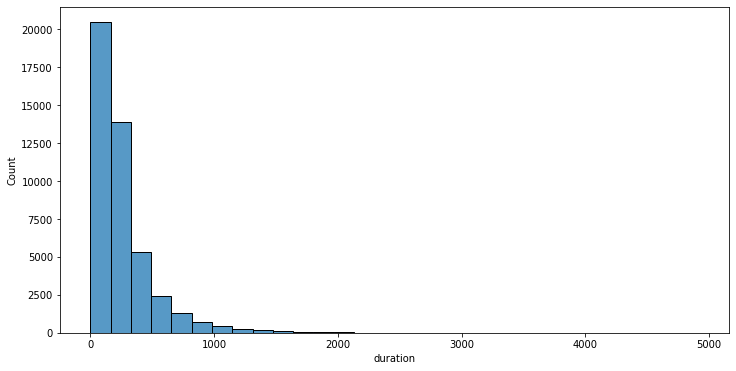

In [ ]:
col_name = ['previous', 'pdays', 'campaign', 'duration']
for name in col_name:
  plt.figure(figsize=(12,6)) # setting the plotsize
  sns.histplot(data=df, x=name,bins=30); # plotting out the graph

As observed in the above histograms, all the numberical columns are distributed normally with a high positive skewness leading to very long right tails. This clearly indicates presence of some outliers. We will be finding these and removing them in the subsequent steps.  

__Calculating the Threshold Values__

We take the threshold value to be 6 Standard Deviation away, since these columns are highly positively skewed. Hence, through some trial and error, we figure out that the optimal multiple for the standard deviation is 6.

In [ ]:
thres_previous = df['previous'].mean() + 6*df['previous'].std() #calculating threshold value for the column upto its 6th standard deviation
len(df[df['previous'] > thres_previous]) # checking how many points are beyond our x-axis' upper limit

128

In [ ]:
thres_pdays = df['pdays'].mean() + 6*df['pdays'].std() #calculating threshold value for the column upto its 6th standard deviation
len(df[df['pdays'] > thres_pdays]) # checking how many points are beyond our x-axis' upper limit

47

In [ ]:
thres_campaign = df['campaign'].mean() + 6*df['campaign'].std() #calculating threshold value for the column upto its 6th standard deviation
len(df[df['campaign'] > thres_campaign]) # checking how many points are beyond our x-axis' upper limit

209

In [ ]:
thres_duration = df['duration'].mean() + 6*df['duration'].std() #calculating threshold value for the column upto its 6th standard deviation
len(df[df['duration'] > thres_duration]) # checking how many points are beyond our x-axis' upper limit

107

### __Outlier Cleaning__
We see that there are some outliers for the above mentioned columns and we will now remove them.

In [ ]:
df = df[df['previous'] < thres_previous] # removing all the values which are greater than threshold value for this column
len(df) # checking the length of the dataframe

45083

In [ ]:
df = df[df['pdays'] < thres_pdays] # removing all the values which are greater than threshold value for this column
len(df) # checking the length of the dataframe

45038

In [ ]:
df = df[df['campaign'] < thres_campaign] # removing all the values which are greater than threshold value for this column
len(df) # checking the length of the dataframe

44829

In [ ]:
df = df[df['duration'] < thres_duration] # removing all the values which are greater than threshold value for this column
len(df) # checking the length of the dataframe

44723

__Performing analysis on Age column:__

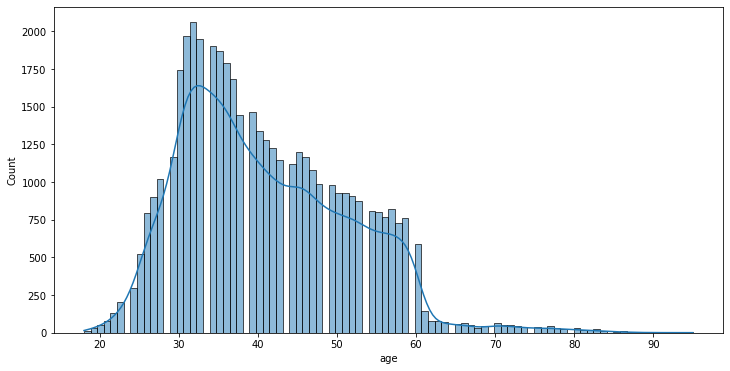

In [ ]:
plt.figure(figsize=(12,6)) # setting the plot size
sns.histplot(data=df,x='age',kde=True); # Plotting the distribution

__Analysing age of customers:__ 

We want to look at the distribution of the variable age to later gauge what age group is more likely to default. 
The age variable has a sharp drop in number after 60 and most of the customers fall under the age range of 20 to 60. 
In our analysis we will focus on age groups between 20 - 60 as that seems to be the major demographic of customers.  

In [ ]:
df.describe()['age'] # checking descriptive stats for age column

count    44723.000000
mean        40.944480
std         10.623826
min         18.000000
25%         33.000000
50%         39.000000
75%         48.000000
max         95.000000
Name: age, dtype: float64

__Create categorical column for age variable:__

Let's segment/bin age into various numerical catgeories. We shall be creating 7 categories for age. The bin size is 10 year year. Doing this will help us in exploring other columns as we can map various other categorical/numerical columns to a particular 'age-group'. 

In [ ]:
# defining customer age ranges
def cat_age(x):
  '''
  Binning the numerical age column into various numerical categroies to assist us in doing further EDA. 
  '''
  if x in range(18,30): # age range 18 to 30 binned in category 1
      return 1
  elif x in (range(30,40)): # age range 30 to 40 binned in category 1
      return 2
  elif x in range(40,50): # age range 40 to 50 binned in category 1
      return 3
  elif x in range(50,60): # age range 50 to 60 binned in category 1
      return 4
  elif x in range(60,70): # age range 60 to 70 binned in category 1
      return 5
  elif x in range(70,80): # age range 70 to 80 binned in category 1
      return 6
  elif x in range(80,95): # age range 80 to 95 binned in category 1
      return 7

In [ ]:
# using lambda function to categorize the data into the bins created
df['age_cat'] = df['age'].apply(lambda x: cat_age(x))

In [ ]:
# Viewing top 5 rows of data
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Term Deposit,default2,age_cat
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,other,no,0,4.0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,other,no,0,3.0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,other,no,0,2.0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,other,no,0,3.0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,other,no,0,2.0


### __Data Visualization__

__Scatter Plot for Age, Day and Default__

Scatter plots are instrumental in determining the distribution of multiple variables. We want to see the distribution of defaulters across age and day on which the customer was contacted. 

(20.0, 45.0)

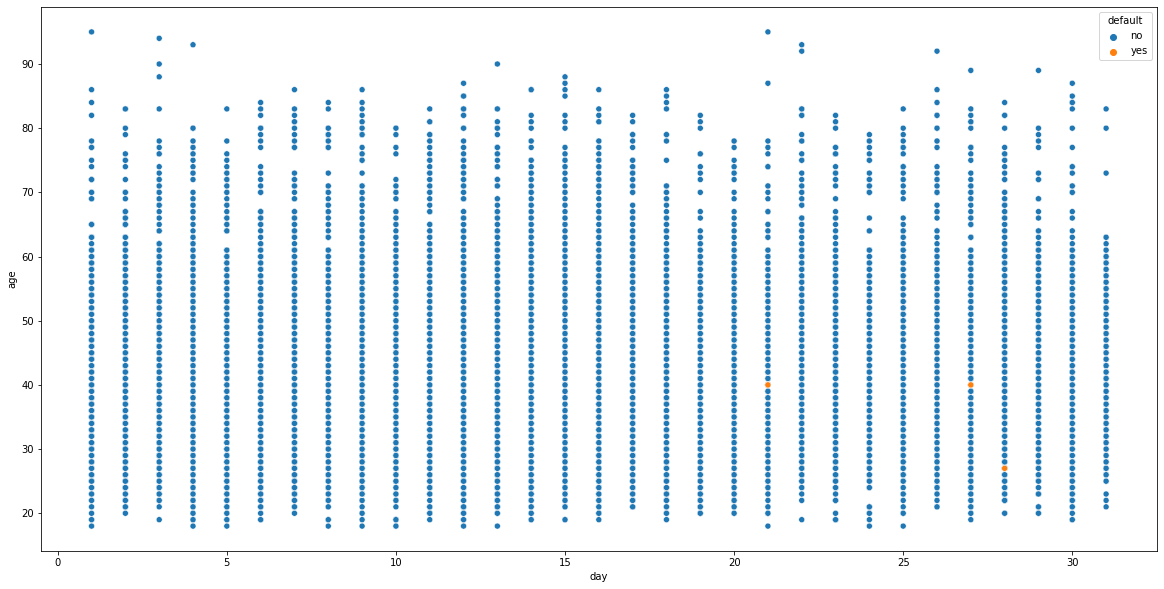

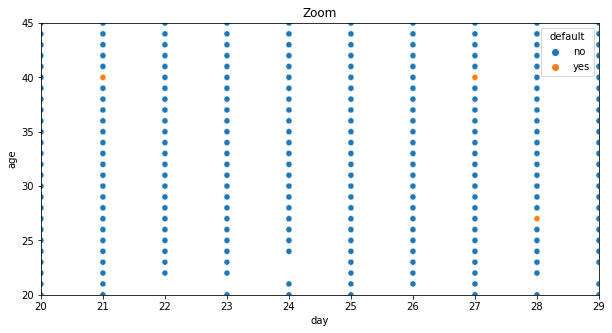

In [ ]:
fig1, ax1 = plt.subplots(figsize=(20,10))
fig2, ax2 = plt.subplots(figsize=(10,5))
sns.scatterplot(data=df,x='day',y='age',hue='default', ax=ax1)
sns.scatterplot(data=df,x='day',y='age',hue='default', ax=ax2).set(title = 'Zoom')
ax2.set_xlim(20,29)
ax2.set_ylim(20,45)

We can see that age is equally distributed across the various number of days. We also see there is a huge number of values which have a default as 'No' across all ages. A few defaulted customers are spread across age ranges between 30 and 40. We don't see any visible trends with this analysis, we will continue to explore other variables and their correlations.

__Box Plot for relation between age, job and default__
 
We will perform further analysis between age and job to determine the distribution of age for each job category regarding the default rate.

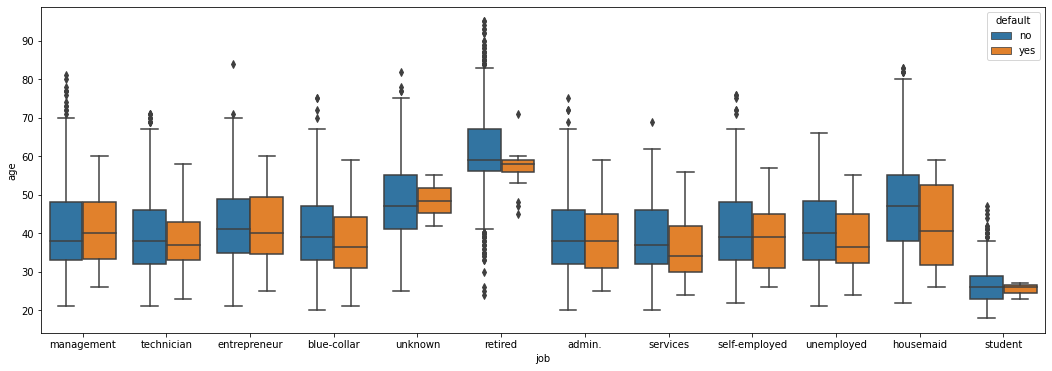

In [ ]:
plt.figure(figsize=(18,6)) # setting up the plot size
sns.boxplot(data=df,x='job',y='age', hue='default'); # plotting the graph

For most job categories, customers lie between the age ranges of mid 30s to late 40s. Additionally, we could focus our research on this age group, mainly because the unemployed customers also fall in this range. We could determine how likely they are to default without a steady income anymore.<br> 
Moreover, we could analyse the category of retired customers and how likely they are to default. <br>
We can notice that, the defaulters (in this case) are 'usually' younger than non-defaulter. However, this difference of age seems quite small


__Age groups histogram__ 

We can also determine from the below plot that the age group where most customer lie is between 30 - 40

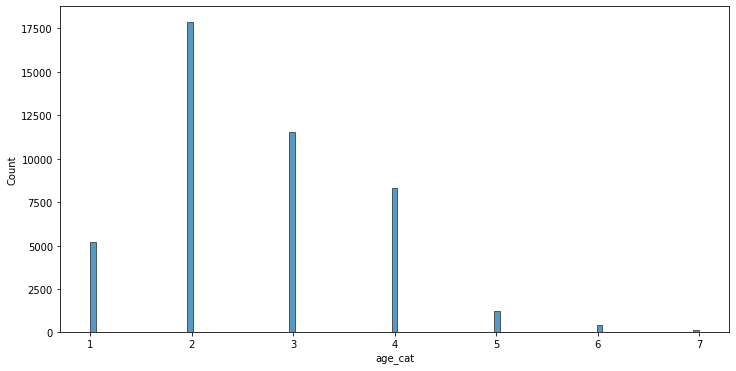

In [ ]:
plt.figure(figsize=(12,6)) # setting the plot size
sns.histplot(x='age_cat',data=df); # plotting the graph

In [ ]:
# Let's find the average age of defaulters. We will take median as a metric as it won't be much affected  by outliers 
median_default_age = df[df['default']=='yes']['age'].median() # calculating the median age of defaulters
median_default_age 

38.0

In [ ]:
# Let's find the average age of non-defaulters. We will take median as a metric as it won't be much affected  by outliers
median_non_default_age = df[df['default']=='no']['age'].median() # calculating the median age of non-defaulters
median_non_default_age

39.0

Our assumption turned out to be True, as the median defaulting age is less than the median non-defaulting age, but the difference is small. We will also show the above results graphically in the Box Plot made below

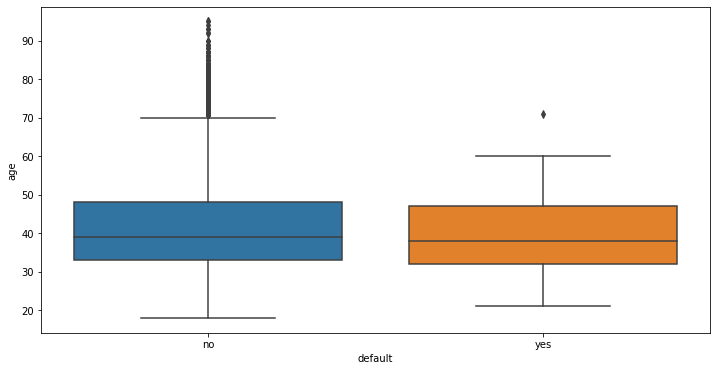

In [ ]:
plt.figure(figsize=(12,6)) # setting the plot size
sns.boxplot(data=df,y='age',x='default') # plotting the graph

In [ ]:
# Creating a copy of the processed data to perform further analysis 
df2 = df.copy()

__Scatter plot for balance and age on default variable__

(20.0, 55.0)

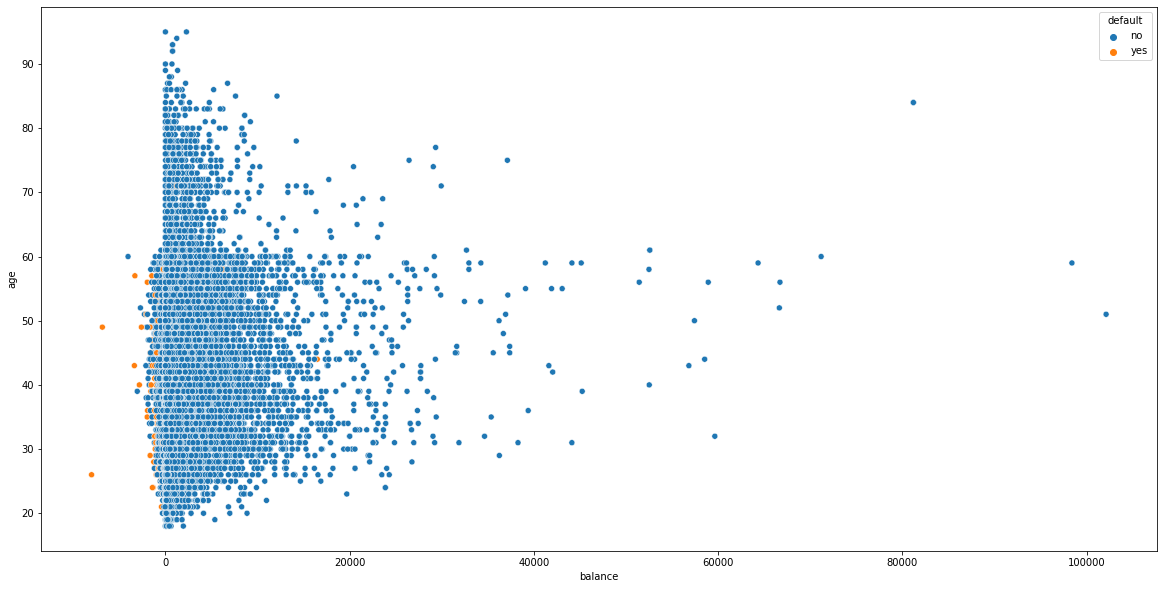

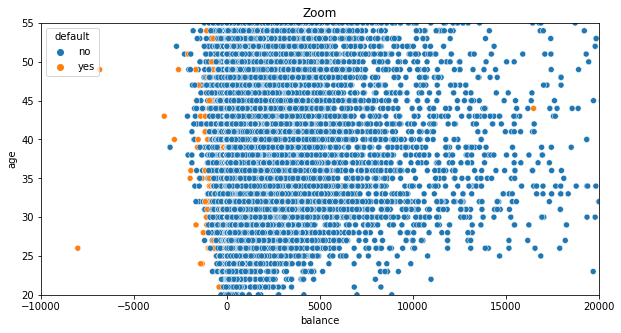

In [ ]:
fig1, ax1 = plt.subplots(figsize=(20,10)) 
fig2, ax2 = plt.subplots(figsize=(10,5))
sns.scatterplot(data=df,x='balance',y='age',hue='default', ax=ax1)
sns.scatterplot(data=df,x='balance',y='age',hue='default', ax=ax2).set(title = 'Zoom')
ax2.set_xlim(-10000,20000)
ax2.set_ylim(20,55)

It is evident from the above plot that majority of defaulters have a balance below 0. Balance proves to be another important parameter to consider when building our model.

__Box plot for age and housing on default__

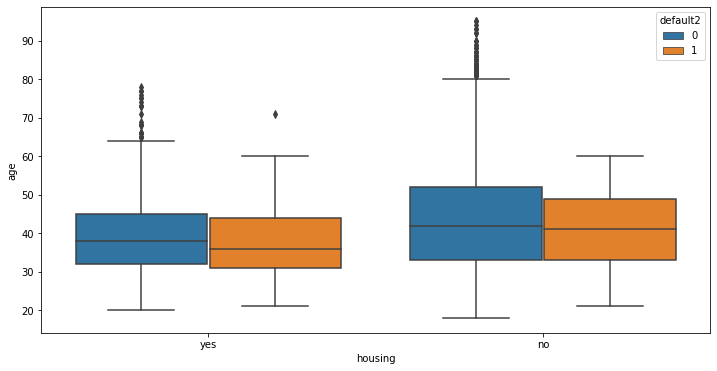

In [ ]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df,y='age',x='housing', hue= 'default2')

Those who have a house and have not defaulted have a mean age of just below 40 and have many outliers. Those who have a house and have defaulted have a lower mean age. Those who don’t own a house have a mean age of around 40, irrespective of if they have defaulted or not. 

**Box plot for age and loan on default**

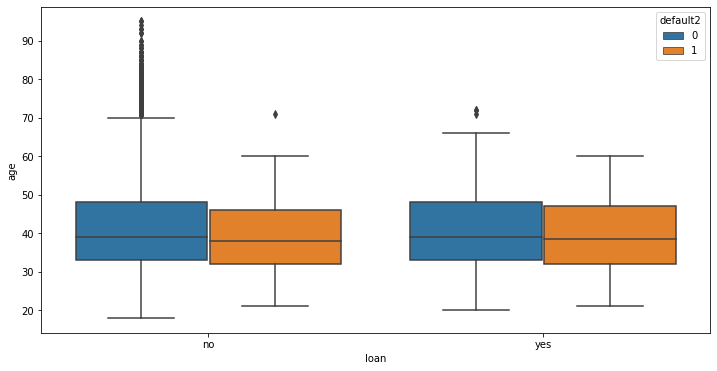

In [ ]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df,y='age',x='loan', hue= 'default2')

Those who have a loan and have defaulted have a mean age of just below 40 and have many outliers. Those who have a loan and have not defaulted have a mean age of around 35 with only one outlier. Those who don’t have a loan have a mean age of 40, irrespective of if they have defaulted or not. There are several outliers in the category of who haven’t defaulted and don’t have a loan. 

__Box plot for age and education on default__

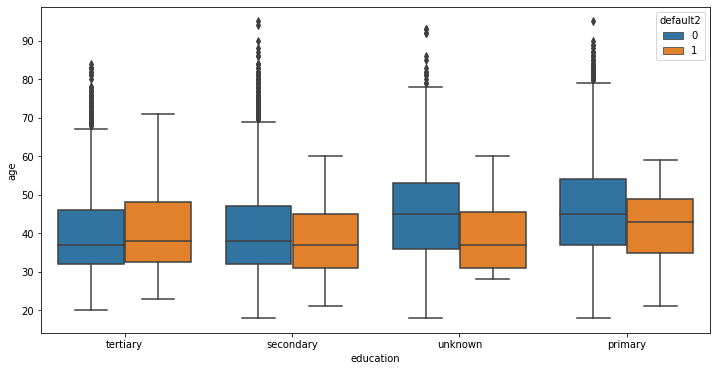

In [ ]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df,y='age',x='education', hue= 'default2')

The mean age of customers who have primary education and have defaulted have is lower than those who haven’t. 
The mean age of customers with secondary and tertiary education is around 40 years irrespective if they have defaulted or not.

__Box plot for age and marital status on default__

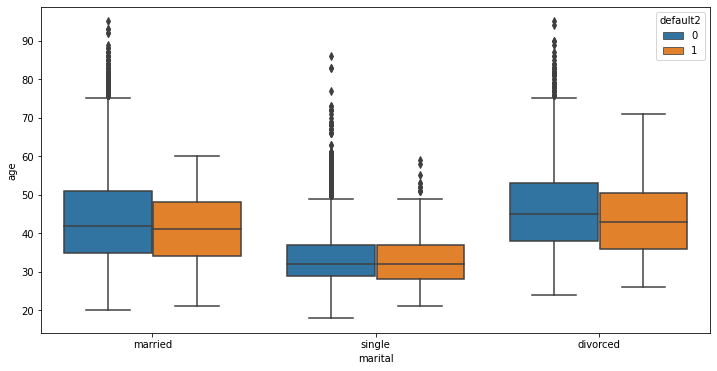

In [ ]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df,y='age',x='marital', hue= 'default2')

The mean age of customers who are single is around 30 irrespective of their default status. The age of customers who are married and have defaulted is more closely packed between the age of 20 and 60. 
The mean age of customers who are divorced and have defaulted is just above 40.

## **Implementation of Machine Learning Models**

**Data Pre-processing for ML model implementation**
<br>
These steps would include: 
- Creation of dummy columns
- Separating independent variables from target variables
- Splitting into testing and training dataset 
- Standard scaling of training and testing dataset

**Encoding Categorical data**
<br>
We are encoding categorical data to numerical values using dummies. This will enable us to perform statistical inferences and ML implementations on the data.  

In [ ]:
# Making a separate copy so that our original dataframe doesn't get hampered.
df2 = df.copy()

In [ ]:
# Checking the head
df2.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Term Deposit,default2,age_cat
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,other,no,0,4.0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,other,no,0,3.0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,other,no,0,2.0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,other,no,0,3.0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,other,no,0,2.0


In [ ]:
# Checking unique categories for day column
df2['day'].unique()

array([ 5,  6,  7,  8,  9, 12, 13, 14, 15, 16, 19, 20, 21, 23, 26, 27, 28,
       29, 30,  2,  3,  4, 11, 17, 18, 24, 25,  1, 10, 22, 31])

In [ ]:
# Renaming columns for the new copy dataframe
df2.columns = ['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'Term Deposit', 'default2', 'age_cat']

In [ ]:
# Using pandas function get_dummies to get numerical dummy values for categorical variables
df2 = pd.get_dummies(data=df2,columns=['job','marital','education','housing','loan','contact','month','poutcome','Term Deposit'],drop_first=True)

In [ ]:
# Checking the head
df2.head()

,age,default,balance,day,duration,campaign,pdays,previous,default2,age_cat,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_married,marital_single,education_secondary,education_tertiary,education_unknown,housing_yes,loan_yes,contact_telephone,contact_unknown,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,Term Deposit_yes
0,58,no,2143,5,261,1,-1,0,0,4.0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0
1,44,no,29,5,151,1,-1,0,0,3.0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0
2,33,no,2,5,76,1,-1,0,0,2.0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0
3,47,no,1506,5,92,1,-1,0,0,3.0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0
4,33,no,1,5,198,1,-1,0,0,2.0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0


We can see that all the categorical columns are split into their dummy columns. A categorical n different categories get split into n-1 dummy columns. 

In [ ]:
# Setting max columns to None 
pd.set_option('max_columns',None)

In [ ]:
# Checking unique categories for month variable
df['month'].unique()

array(['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'jan', 'feb',
       'mar', 'apr', 'sep'], dtype=object)

**Analyze correlation between target variable and transformed variables**

In [ ]:
100 * df2.corr()['default2'].sort_values()[:-1]

balance               -6.676832
pdays                 -3.028083
previous              -2.928494
poutcome_success      -2.338077
Term Deposit_yes      -2.184060
age                   -1.784624
age_cat               -1.746359
month_oct             -1.734259
contact_telephone     -1.679818
job_student           -1.621904
education_tertiary    -1.532857
marital_married       -1.471473
month_mar             -1.399750
month_sep             -1.373301
job_retired           -1.113305
month_dec             -0.927687
month_feb             -0.877573
duration              -0.800018
month_aug             -0.790545
month_jan             -0.769842
job_unknown           -0.664169
housing_yes           -0.637668
job_technician        -0.410565
month_may             -0.256931
job_management        -0.256034
education_unknown     -0.172068
job_services          -0.055937
job_housemaid         -0.018045
marital_single         0.317563
job_self-employed      0.445664
month_nov              0.590238
job_unem

We now see higher correlation between some of the variables such as job_entrepreuner and loan_yes with default. We have achieved the results we expected to see after converting categrical values to numerical. These variables will be crucial in building our model and analysis.

In [ ]:
# Checking the head
df2.head()

,age,default,balance,day,duration,campaign,pdays,previous,default2,age_cat,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_married,marital_single,education_secondary,education_tertiary,education_unknown,housing_yes,loan_yes,contact_telephone,contact_unknown,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,Term Deposit_yes
0,58,no,2143,5,261,1,-1,0,0,4.0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0
1,44,no,29,5,151,1,-1,0,0,3.0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0
2,33,no,2,5,76,1,-1,0,0,2.0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0
3,47,no,1506,5,92,1,-1,0,0,3.0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0
4,33,no,1,5,198,1,-1,0,0,2.0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0


Checking what percentage of our target column has default as 'yes' and what has 'no'.

In [ ]:
(len(df[df['default'] == 'yes']) / len(df)) * 100

1.799968696196588

In [ ]:
(len(df[df['default'] == 'no']) / len(df)) * 100

98.20003130380341

We observe that our target column is heavily imbalanced with default = 'no' having almost 98% of all values while default == 'yes' has only 2%. In this case, metrics like accuracy will fail because the ML model will have a high bias towards default == 'no' as that is the majority class. 
<br><br>
So we have to stick with metrics like F-1 score, which is the harmonic mean of precision and recall. 
<br>
precision: The quality, condition, or fact of being exact and accurate.(1) 
<br>recall: bring (a fact, event, or situation) back into one's mind; remember. (2)
<br><br>
References: 
<br> (1) [Precision Definition](https://languages.oup.com/google-dictionary-en/)
<br> (2) [Recall Definition](https://languages.oup.com/google-dictionary-en/)


### **Resampling Dataset**
<br>
The better approach would be to resample our dataset, that is making a new dataset out of the original dataframe. 
<br>
There are three ways of resampling <br>
1. Undersampling
  <br>In this approach, we take all the samples from the minority class which in this case default == 'yes' and then we sample data from the majority class in such a way that the resulting dataframe gets balanced (ratios like 50% -50% or 60% - 40% are usually acceptable). The downside of this approach is we get low number of samples to train our ML model on. However, all of our values are unique and no replication has occurred. <br>
2.Oversampling
  <br>In this approach we oversample the minority class (usually by duplication) and make it comparable to the length of majority class. However, the downside to this approach is using some duplicate values of minority class but we get a higher number of samples to train our ML model on. <br>
3. SMOTE
<br> SMOTE stands for Synthetic Minority Oversampling Technique (1) 
In this approach, we take a hybrid model of undersampling as well as oversampling by randomly generating few points and marking them as minority class, that is default == 'yes'. By this, we will achieve high number of samples as well as some unique points. Our ML model will have a high number of samples to be trained on as well as we will have some unique values. 

<br>
We will try all these three approaches and choose the approach that works the best.

References: (1) [SMOTE abbreviation](https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/) 

### **Undersampling: 60-40 ratio**

We are aiming for a 60%-40% ratio for target varibale (60% default == 'no', 40% default == 'yes')
<br>
This is being done to mimick the original dataset in a very crude form. 

In [ ]:
len(df[df['default'] == 'yes'])

805

Since we have only 805 samples of default == 'yes', by doing some calculation, we get to know, that to make a 60%-40% distribution we have to take approximately 1205 samples from majority class and all 805 samples from minority class. 

In [ ]:
# Separating out the majority class
df_no = df[df['default']=='no']

In [ ]:
#Randomly selecting 1215 samples to meet the ratio
df_no = df_no.sample(1205,random_state=42)

In [ ]:
# Separating out the minority class
df_yes = df[df['default']=='yes']

In [ ]:
#Concatenating the two DFs to achieve the undersampled DF
df_undersample_1 =pd.concat([df_yes,df_no],axis=0) 

In [ ]:
df_undersample_1.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Term Deposit,default2,age_cat
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,other,no,1,3.0
79,55,services,divorced,secondary,yes,1,yes,no,unknown,5,may,208,1,-1,0,other,no,1,4.0
338,51,admin.,single,secondary,yes,-2,no,no,unknown,5,may,402,3,-1,0,other,no,1,4.0
419,33,technician,married,secondary,yes,72,yes,no,unknown,6,may,623,1,-1,0,other,no,1,2.0
458,33,blue-collar,single,secondary,yes,-60,no,no,unknown,6,may,243,1,-1,0,other,no,1,2.0


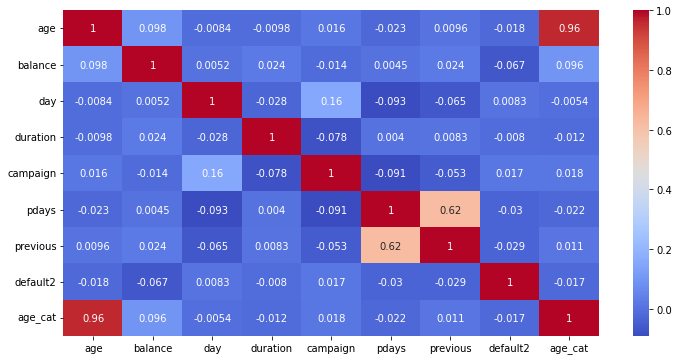

In [ ]:
# Plotting a heat map to show the correlation between every column 
plt.figure(figsize=(12,6)) # setting up the figure size
sns.heatmap(data=df.corr(),cmap='coolwarm',annot=True) # plotting the graph

In [ ]:
df_undersample_1.head() # taking the head of undersampled data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Term Deposit,default2,age_cat
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,other,no,1,3.0
79,55,services,divorced,secondary,yes,1,yes,no,unknown,5,may,208,1,-1,0,other,no,1,4.0
338,51,admin.,single,secondary,yes,-2,no,no,unknown,5,may,402,3,-1,0,other,no,1,4.0
419,33,technician,married,secondary,yes,72,yes,no,unknown,6,may,623,1,-1,0,other,no,1,2.0
458,33,blue-collar,single,secondary,yes,-60,no,no,unknown,6,may,243,1,-1,0,other,no,1,2.0


In [ ]:
df_undersample_1.info() # checking the info of undersampled data

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2010 entries, 7 to 859
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   age           2010 non-null   int64  
 1   job           2010 non-null   object 
 2   marital       2010 non-null   object 
 3   education     2010 non-null   object 
 4   default       2010 non-null   object 
 5   balance       2010 non-null   int64  
 6   housing       2010 non-null   object 
 7   loan          2010 non-null   object 
 8   contact       2010 non-null   object 
 9   day           2010 non-null   int64  
 10  month         2010 non-null   object 
 11  duration      2010 non-null   int64  
 12  campaign      2010 non-null   int64  
 13  pdays         2010 non-null   int64  
 14  previous      2010 non-null   int64  
 15  poutcome      2010 non-null   object 
 16  Term Deposit  2010 non-null   object 
 17  default2      2010 non-null   int64  
 18  age_cat       2010 non-null  

#### Now we shall move towards implementing Machine Learning algorithms on the undersampled dataset. 
However, before that we need to process data such that it becomes suitable for the ML model to get deployed on. This includes various steps, such as:<br> 
1. Segregating independent columns from tagret column. <br>
2. Splitting the data into training and test data set (randomly sampled). <br>
3. Scaling the data appropriately. <br>
4. Implementing the ML model and evaluating its performance on test data.

In [ ]:
df_undersample_2 = df_undersample_1.copy() # making a copy of undersampled data to do more mathematical operations and to keep the original undersampled data intact a

##### We will segregate the independent columns from the dependent column (or target column). We will also remove unncessary columns from the dataframe containing independent column

In [ ]:
X = df_undersample_2.drop(['default','default2','age_cat'],axis=1) # creating a dataframe containing only containing independent columns and removing all unncessary columns.
y = df_undersample_2['default'] # segregating target column

In [ ]:
X.info() # checking the info of the 'X' dataframe which consists of only important independent columns

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2010 entries, 7 to 859
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   age           2010 non-null   int64 
 1   job           2010 non-null   object
 2   marital       2010 non-null   object
 3   education     2010 non-null   object
 4   balance       2010 non-null   int64 
 5   housing       2010 non-null   object
 6   loan          2010 non-null   object
 7   contact       2010 non-null   object
 8   day           2010 non-null   int64 
 9   month         2010 non-null   object
 10  duration      2010 non-null   int64 
 11  campaign      2010 non-null   int64 
 12  pdays         2010 non-null   int64 
 13  previous      2010 non-null   int64 
 14  poutcome      2010 non-null   object
 15  Term Deposit  2010 non-null   object
dtypes: int64(7), object(9)
memory usage: 267.0+ KB


In [ ]:
# Since Ml models only take in numerical data, hence we are taking dummies of all categorical data. 
X2 = pd.get_dummies(data=X , columns= ['job','marital','education','housing','loan','contact','month','poutcome','Term Deposit'],drop_first=True)

In [ ]:
X2.head()

,age,balance,day,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_married,marital_single,education_secondary,education_tertiary,education_unknown,housing_yes,loan_yes,contact_telephone,contact_unknown,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,Term Deposit_yes
7,42,2,5,380,1,-1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0
79,55,1,5,208,1,-1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0
338,51,-2,5,402,3,-1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0
419,33,72,6,623,1,-1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0
458,33,-60,6,243,1,-1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0


In [ ]:
# Importint the train_test_split function to split the data into train and test split
from sklearn.model_selection import train_test_split 

In [ ]:
# Splitting the undersample data into train and test dataset
X_train, X_test, y_train, y_test = train_test_split(X2, y, test_size=0.33, random_state=42)

In [ ]:
# Importing the function to do Standard scaling
from sklearn.preprocessing import StandardScaler

In [ ]:
# creating the instance of StandardScaler function so that the model does not get inclined towards any particular column (due to its high numerical value)
sc = StandardScaler() 

In [ ]:
# Fitting and transforming the training undersampled dataset using the standard scaling instance created above. We are just "transforming" the test set in order to avoid any data leakage
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
X_train.shape # Checking the shape of the training dataset

(1346, 41)

### Now for verifying our results on the original data, we will also create a copy of the original dataframe

In [ ]:
X_for_actual_test = df.copy() # Creating a copy of the original dataframe in order to measure the model's performance on the original

In [ ]:
X_for_actual_test.drop(['default2','age_cat'],inplace=True,axis=1) # Dropping the unneccessary column

In [ ]:
# Segregating the original dataframe's independent and dependent columns to use in further analysis
X_for_actual_test_real = X_for_actual_test.drop('default',axis=1)
y_for_actual_test_real = X_for_actual_test['default']

In [ ]:
X_for_actual_test_real.head() # taking the head of original data's test dataframe

,age,job,marital,education,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Term Deposit
0,58,management,married,tertiary,2143,yes,no,unknown,5,may,261,1,-1,0,other,no
1,44,technician,single,secondary,29,yes,no,unknown,5,may,151,1,-1,0,other,no
2,33,entrepreneur,married,secondary,2,yes,yes,unknown,5,may,76,1,-1,0,other,no
3,47,blue-collar,married,unknown,1506,yes,no,unknown,5,may,92,1,-1,0,other,no
4,33,unknown,single,unknown,1,no,no,unknown,5,may,198,1,-1,0,other,no


In [ ]:
# taking the dummies of test data's column for analysis (to check ML model's accuracy on orignal dataframe's test set)
X_for_actual_test_real = pd.get_dummies(data=X_for_actual_test_real , columns=['job','marital','education','housing','loan','contact','month','poutcome','Term Deposit'],drop_first=True)

In [ ]:
X_for_actual_test_real = sc.transform(X_for_actual_test_real) # scaling the test data

In [ ]:
X_for_actual_test_real.shape # checking the test data's shape

(44723, 41)

In [ ]:
y_for_actual_test_real.shape

(44723,)

In [ ]:
# Importing the important metrics which we shall be using in order to evaluate our ML model
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score,f1_score, make_scorer, roc_auc_score

In [ ]:
from sklearn.model_selection import cross_val_score, cross_validate

In [ ]:
scoring = {'accuracy' : make_scorer(accuracy_score), 'f1_score' : make_scorer(f1_score)}

In [ ]:
y_hat = df['default2'] # taking the numerical values of default from original dataframe

In [ ]:
100 * df_undersample_1.corr()['default2'].sort_values()[:-1] # checking the correlation percentage of each column with the 'default' column in undersampled dataset

balance    -27.420013
previous   -10.700183
pdays      -10.552801
age_cat     -8.118862
age         -7.761777
duration    -2.726210
day          3.017538
campaign     4.197564
Name: default2, dtype: float64

### Achieved relatively high correlation wiht respect to our target variables

In [ ]:
# Importing MinMaxScaler to 'Normalize' the data and creating an instance of it
from sklearn.preprocessing import MinMaxScaler
mmt = MinMaxScaler()

In [ ]:
# Fitting and transforming the data using 'Normalization' function. We are just "transforming" the test set in order to avoid any data leakage
X_train_2 = mmt.fit_transform(X_train)
X_test_2 = mmt.transform(X_test)

## Let's start off with ML Algos for classification
## 1) Random Forest

 Random Forest is an "ensemble learning" algorithm which can be used for both classification as well as regression. Here we are using it for classification (as our use case is classification). This algorithm creates an ensemble of various "Decision Trees" (which work on creating a "split" based on various parameteric values)

#### Creating the Random Forest model

In [ ]:
# Importing the Random Forest classification function
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# Creating a random forest instance and setting up the hyperparameters
rf = RandomForestClassifier(n_estimators=1000,random_state=42,criterion='entropy') 

#### Fitting the Model

In [ ]:
# Fitting the model on the training dataset
rf.fit(X_train_2,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=1000, random_state=42)

#### Predicting on undersampled test set

In [ ]:
# Using the model to predict on the test data
rf_pred = rf.predict(X_test_2)

#### Evaluating the model on the undersampled test set

In [ ]:
print(classification_report(y_test,rf_pred),end='\n') # Printing a classification report
print(confusion_matrix(y_test,rf_pred),end='\n')
print(accuracy_score(y_test,rf_pred),end='\n')

              precision    recall  f1-score   support

          no       0.82      0.81      0.82       395
         yes       0.73      0.75      0.74       269

    accuracy                           0.78       664
   macro avg       0.78      0.78      0.78       664
weighted avg       0.79      0.78      0.79       664

[[320  75]
 [ 68 201]]
0.7846385542168675


### On undersampled test data we got an accuracy of 79% and f1-score of 74%. Let's try this Random Forest model on original dataset

In [ ]:
# Doing predictions on "Normalized" test set of original dataframe
rf_pred_actual = rf.predict(mmt.transform(X_for_actual_test_real))

#### Evaluating the model on "Normalized" test dataframe

In [ ]:
print(classification_report(y_for_actual_test_real,rf_pred_actual),end='\n')
print(confusion_matrix(y_for_actual_test_real,rf_pred_actual),end='\n')
print(accuracy_score(y_for_actual_test_real,rf_pred_actual),end='\n')
f1_score(y_for_actual_test_real,rf_pred_actual,pos_label='yes')

              precision    recall  f1-score   support

          no       1.00      0.84      0.91     43918
         yes       0.09      0.92      0.17       805

    accuracy                           0.84     44723
   macro avg       0.55      0.88      0.54     44723
weighted avg       0.98      0.84      0.90     44723

[[36738  7180]
 [   68   737]]
0.8379357377635669


0.16899793625315296

#### On test dataset, Random Forest acieved accuracy of 92% and f1-score of 17%

#### OVERSAMPLING <br>
Oversampling the minority class and making it approximately equal to the length of majority class using "duplication". 

In [ ]:
df.head() # checking the head of the original dataset

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Term Deposit,default2,age_cat
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,other,no,0,4.0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,other,no,0,3.0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,other,no,0,2.0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,other,no,0,3.0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,other,no,0,2.0


In [ ]:
df_yes = df[df['default']=='yes'].sample(400) # segregating the minority class and taking half of it randlomly

In [ ]:
df_no = df[df['default']=='no'].sample(20000) # segregating the majority class and taking half of it randlomly

In [ ]:
len(df_no) # length of majority class now

20000

In [ ]:
len(df_yes) # length of minority class now

400

In [ ]:
len(df_no)/len(df_yes) # checking the ratio of lengths of majority class with minority class

50.0

Let us concatenate df_yes with itself 45 times, in order to maintain a composition which is similar to the original dataset

In [ ]:
df_yes = pd.concat(([df_yes]*45),axis=0)

In [ ]:
len(df_yes) # length of oversampled minority class

18000

In [ ]:
df_oversample = pd.concat([df_yes,df_no],axis=0) # concatenating the two dataframes vertically

In [ ]:
len(df_oversample) # length of the oversampled dataframe

38000

#### Moving towards applying ML algorithm on the dataset which we created using oversampling technique. Steps are as follows: <br>
1. Splitting the data into training and test data set (randomly sampled). <br>
2. Scaling the data appropriately. <br>
3. Implementing the ML model and evaluating its performance on test data.

Step 1. Splitting the data into train and test set

In [ ]:
# Segregating out dependent and indepndent columns for ML model implmentation
X_oversample = df_oversample.drop(['default','default2','age_cat'],axis=1)
y_oversample = df_oversample['default']

In [ ]:
# taking dummies of all the categorical column
X_oversample_2 = pd.get_dummies(data=X_oversample , columns= ['job','marital','education','housing','loan','contact','month','poutcome','Term Deposit'],drop_first=True)

In [ ]:
X_oversample_2.shape # checking the shape

(38000, 41)

In [ ]:
# Splitting the oversampled data into train and test set
X_train_oversample, X_test_oversample, y_train_oversample, y_test_oversample = train_test_split(X_oversample_2, y_oversample, test_size=0.33, random_state=42)

In [ ]:
X_train_oversample.shape # checking the shape of the oversampled train data

(25460, 41)

In [ ]:
X_test_oversample.shape # checking the shape of the oversampled test data

(12540, 41)

Step 2. Scaling the data appropriately

In [ ]:
# Standard scaling of the train and test set on the oversampled data
X_train_oversample_1 = sc.fit_transform(X_train_oversample)
X_test_oversample_1 = sc.transform(X_test_oversample)

In [ ]:
# Normalized scaling of the train and test set on the oversampled data
X_train_oversample_2 = mmt.fit_transform(X_train_oversample)
X_test_oversample_2 = mmt.transform(X_test_oversample)

Step 3. Implementing ML algorithm model and evaluating its performance on test set

#### 1) Random Forest

In [ ]:
rf_oversample = RandomForestClassifier(n_estimators=100,random_state=42,criterion='entropy',class_weight={'yes':0.9,'no':0.1}) # creating an instance of Random Forest model

In [ ]:
rf_oversample.fit(X_train_oversample_1,y_train_oversample) # fitting the model on oversampled training set

RandomForestClassifier(class_weight={'no': 0.1, 'yes': 0.9},
                       criterion='entropy', random_state=42)

In [ ]:
rf_oversample_pred = rf_oversample.predict(X_test_oversample_1) # predicitng the target variable on oversampled test set

In [ ]:
# Evaluating the model on oversampled test set
print(classification_report(y_test_oversample,rf_oversample_pred),end='\n')
print(confusion_matrix(y_test_oversample,rf_oversample_pred),end='\n')
print(accuracy_score(y_test_oversample,rf_oversample_pred),end='\n')

              precision    recall  f1-score   support

          no       1.00      1.00      1.00      6597
         yes       1.00      1.00      1.00      5943

    accuracy                           1.00     12540
   macro avg       1.00      1.00      1.00     12540
weighted avg       1.00      1.00      1.00     12540

[[6582   15]
 [   0 5943]]
0.9988038277511961


In [ ]:
rf_oversample_pred_actual = rf_oversample.predict(sc.transform(X_for_actual_test_real)) # predicting the model on original test set

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"


In [ ]:
# Evaluating the model on original test set
print(classification_report(y_for_actual_test_real,rf_oversample_pred_actual),end='\n')
print(confusion_matrix(y_for_actual_test_real,rf_oversample_pred_actual),end='\n')
print(accuracy_score(y_for_actual_test_real,rf_oversample_pred_actual),end='\n')
print(f1_score(y_for_actual_test_real,rf_oversample_pred_actual,pos_label='yes'))

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

          no       0.98      1.00      0.99     43918
         yes       0.00      0.00      0.00       805

    accuracy                           0.98     44723
   macro avg       0.49      0.50      0.50     44723
weighted avg       0.96      0.98      0.97     44723

[[43918     0]
 [  805     0]]
0.9820003130380341
0.0


#### Random Forest using Oversampling achieved 63% f1-score on the original dataset. However, we could notice that this model has a very low recall of 50% and that too because it was trained on it. Hence, this model is not suitable.

# SMOTE

Synthetic Minority Oversampling Technique (SMOTE) is a resampling technique which oversamples the minority class by "synthesizing" various parameters and creating new data points by using various "data augmentation" techniques. By this, we get enough numbers of minority class data points to sufficiently carry out the learning processes for the ML model. Hence, we avoid data duplication of minority class (which is the case in oversampling).  

Let us recheck the count of 'yes' and 'no' in the original dataframe

In [ ]:
from collections import Counter

In [ ]:
print(Counter(df['default'])) # printing the count of different classes in the orignal dataframe

Counter({'no': 43918, 'yes': 805})


In [ ]:
# Importing the SMOTE function
from imblearn.over_sampling import SMOTE

In [ ]:
df2.head() # Checking the head

,age,default,balance,day,duration,campaign,pdays,previous,default2,age_cat,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_married,marital_single,education_secondary,education_tertiary,education_unknown,housing_yes,loan_yes,contact_telephone,contact_unknown,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,Term Deposit_yes
0,58,no,2143,5,261,1,-1,0,0,4.0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0
1,44,no,29,5,151,1,-1,0,0,3.0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0
2,33,no,2,5,76,1,-1,0,0,2.0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0
3,47,no,1506,5,92,1,-1,0,0,3.0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0
4,33,no,1,5,198,1,-1,0,0,2.0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0


In [ ]:
# Splitting the original set for evalauating the ML model on original dataset
X_for_actual_test_real = X_for_actual_test.drop('default',axis=1)
y_for_actual_test_real = X_for_actual_test['default']

In [ ]:
X_for_actual_test_real.head()

,age,job,marital,education,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Term Deposit
0,58,management,married,tertiary,2143,yes,no,unknown,5,may,261,1,-1,0,other,no
1,44,technician,single,secondary,29,yes,no,unknown,5,may,151,1,-1,0,other,no
2,33,entrepreneur,married,secondary,2,yes,yes,unknown,5,may,76,1,-1,0,other,no
3,47,blue-collar,married,unknown,1506,yes,no,unknown,5,may,92,1,-1,0,other,no
4,33,unknown,single,unknown,1,no,no,unknown,5,may,198,1,-1,0,other,no


In [ ]:
X_for_actual_test_real = pd.get_dummies(data=X_for_actual_test_real , columns=['job','marital','education','housing','loan','contact','month','poutcome','Term Deposit'],drop_first=True)

In [ ]:
X_smote = X_for_actual_test_real # Setting up a dataframe consisting of only independent columns

In [ ]:
y_smote = y_for_actual_test_real # Setting up the a series consisting of only the target column

In [ ]:
# Initializing the SMOTE function. We set our SMOTE function to oversample the minority to the number equal to the majority class. 
#Then, we take 20% of the oversampled minority class (randomly sampled). So, 20% of 43918 = 8783
oversample = SMOTE(sampling_strategy=0.2) 

### Importing random under-sampler

In [ ]:
from imblearn.under_sampling import RandomUnderSampler # importing the required function

In [ ]:
# We shall keep undersampled majority class 50% more than the oversampled minority class. 
# This is being done on order to resemble the composition of original dataframe in the SMOTE's dataframe
undersample = RandomUnderSampler(sampling_strategy=0.5)

## Creating a pipeline

We will be creating a pipeline to smoothen the process of creating a SMOTE dataset. Firstly, oversampling would be done and then undersampling part would be done. Finally, the pipeline will be fit on the X_smote and y_smote dataset.

In [ ]:
from imblearn.pipeline import Pipeline # Importing the pipeline

In [ ]:
steps = [('o',oversample),('u',undersample)]  # steps for pipelining. First "do oversampling of the minority class" and then do "undersampling of the majority class"

In [ ]:
pipeline = Pipeline(steps=steps) # Creating the pipeline instance

In [ ]:
X_smote, y_smote = pipeline.fit_resample(X_smote,y_smote) # Fitting the pipeline to our dataset

In [ ]:
print(Counter(y_smote)) # Taking a count of target categories in the SMOTE dataset 

Counter({'no': 17566, 'yes': 8783})


In [ ]:
X_smote.head() # Checking the head

,age,balance,day,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_married,marital_single,education_secondary,education_tertiary,education_unknown,housing_yes,loan_yes,contact_telephone,contact_unknown,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,Term Deposit_yes
0,51,1694,13,186,2,-1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
1,30,61,5,36,7,165,5,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
2,37,0,27,33,6,-1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0
3,44,38,15,152,2,-1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0
4,25,10,21,857,4,-1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1


In [ ]:
len(y_smote) # Checking the length of target column created using SMOTE technique

26349

In [ ]:
X_smote.shape # Checking the shape of SMOTE dataset which we created

(26349, 41)

#### Moving towards applying ML algorithm on the dataset which we created using SMOTE technique. Steps are as follows: <br>
1. Splitting the data into training and test data set (randomly sampled). <br>
2. Scaling the data appropriately. <br>
3. Implementing the ML model and evaluating its performance on test data.

#### Step 1) Splitting the data into training and test data set (randomly sampled).

In [ ]:
# Spltting the data into training and test set
X_train_smote, X_test_smote, y_train_smote, y_test_smote = train_test_split(X_smote, y_smote, test_size=0.2, random_state=42)

In [ ]:
len(X_train_smote) # Checking the length of training set

21079

In [ ]:
print(Counter(y_train_smote)) # printing the count of categories present in target column

Counter({'no': 14025, 'yes': 7054})


#### Step 2: Scaling the data appropriately.

In [ ]:
# Standard scaling the data appropriately
X_train_smote_2 = sc.fit_transform(X_train_smote)
X_test_smote_2 = sc.transform(X_test_smote)

In [ ]:
# Normalized scaling the data appropriately
X_train_smote_3 = mmt.fit_transform(X_train_smote)
X_test_smote_3 = mmt.transform(X_test_smote)

## Implementing ML Algos

### 1) Random Forest

In [ ]:
rf_smote = RandomForestClassifier(n_estimators=100,random_state=42,class_weight={'yes': 0.9,'no':0.1}) # Creating the Random Forest instance

In [ ]:
rf_smote.fit(X_train_smote_2,y_train_smote) # fitting the model on SMOTE train set

RandomForestClassifier(class_weight={'no': 0.1, 'yes': 0.9}, random_state=42)

In [ ]:
rf_smote_pred = rf_smote.predict(X_test_smote_2) # Predicting on the SMOTE test set

In [ ]:
# Printing out the evaluation results for SMOTE test set
print(classification_report(y_test_smote,rf_smote_pred),end='\n')
print(confusion_matrix(y_test_smote,rf_smote_pred),end='\n')
print(accuracy_score(y_test_smote,rf_smote_pred),end='\n')

              precision    recall  f1-score   support

          no       0.95      0.99      0.97      3541
         yes       0.97      0.90      0.93      1729

    accuracy                           0.96      5270
   macro avg       0.96      0.94      0.95      5270
weighted avg       0.96      0.96      0.96      5270

[[3489   52]
 [ 175 1554]]
0.9569259962049336


In [ ]:
rf_smote_pred_actual = rf_smote.predict(sc.transform(X_for_actual_test_real)) # Doing prediction on the original test set

In [ ]:
# Printing out the evaluation results for original test set
print(classification_report(y_for_actual_test_real,rf_smote_pred_actual),end='\n')
print(confusion_matrix(y_for_actual_test_real,rf_smote_pred_actual),end='\n')
print(accuracy_score(y_for_actual_test_real,rf_smote_pred_actual),end='\n')
print(100 * f1_score(y_for_actual_test_real,rf_smote_pred_actual,pos_label='yes'))

              precision    recall  f1-score   support

          no       1.00      0.99      0.99     43918
         yes       0.63      0.81      0.71       805

    accuracy                           0.99     44723
   macro avg       0.81      0.90      0.85     44723
weighted avg       0.99      0.99      0.99     44723

[[43533   385]
 [  149   656]]
0.9880598349842363
71.07258938244854


## Random Forest achieved a CV accuracy of 99% and achieved f1-score of around 70% on original dataset (accuracy on original dataset 97%)

#### Just a random check

In [ ]:
import random

In [ ]:
random.seed(42)

In [ ]:
tester_sample = X_for_actual_test_real.sample(1)
tester_value = y_for_actual_test_real.sample(1)

In [ ]:
tester_sample

,age,balance,day,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_married,marital_single,education_secondary,education_tertiary,education_unknown,housing_yes,loan_yes,contact_telephone,contact_unknown,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,Term Deposit_yes
16583,34,4,24,70,1,-1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0


In [ ]:
tester_value

11875    yes
Name: default, dtype: object

In [ ]:
rf_smote.predict(sc.transform(tester_sample))

array(['no'], dtype=object)

Our random prediction is correct as well.

### Conclusion: <br>
After comparing all the machine learning model we choose to go with the Random Forest model trained (or built) on SMOTE dataset. This is because it takes into account all the relevant metric (such as precision, recall and f1-score) and gives appropriate weights (or importance) to the two classes, because of which it acheived a high score of precision, recall and f1-score. <br>
We won't consider the Random Forest model built on undersampled dataset as it got trained on very less points, hence, it could not capture the essence of the dataset and the model sufferred the issue of "underfitting". <br>
We won't consider the Random Forest model built on overersampled dataset as it got trained too many "duplicated" points, thus, the model could not capture the tendencies of defaulting and only predicited those points on which it got trained. So, when we tested the model on the oversampled test set, it "overfit". 